In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.columns = ['Month','Sales']
df.drop(106, axis =0, inplace = True)
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [5]:
df.drop(105, axis = 0, inplace = True)

### Convert data into date time variable

In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [8]:
df.set_index('Month', inplace = True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [9]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualize the Data

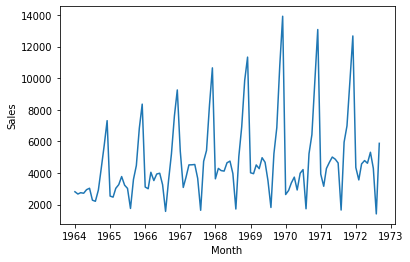

In [10]:
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## Testing Stationarity

### Using Rolling Statistics

In [11]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()

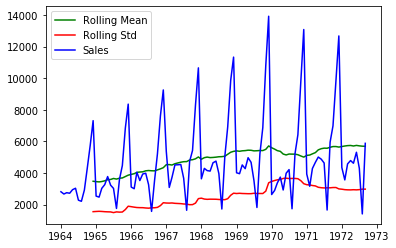

In [12]:
plt.plot(rolling_mean, color = 'green', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'red', label = 'Rolling Std')
plt.plot(df, color = 'blue', label = 'Sales')
plt.legend(loc = 'best')

### Using Dickeyfuller Test

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result = adfuller(df['Sales'])

In [15]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['Test Statistic', 'p-value', '#Lags Used', '#Observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05 :
        print('Reject Null Hypothesis. Data is stationary')
    else:
        print('Cannot reject Null Hypothesis. Data is not Stationary')
    
    rolling_mean = sales.rolling(window = 12).mean()
    rolling_std = sales.rolling(window = 12).std()
    plt.plot(rolling_mean, color = 'green', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'red', label = 'Rolling Std')
    plt.plot(sales, color = 'skyblue', label = 'Sales')
    plt.legend(loc = 'best')

Test Statistic:-1.8335930563276297
p-value:0.3639157716602417
#Lags Used:11
#Observations used:93
Cannot reject Null Hypothesis. Data is not Stationary


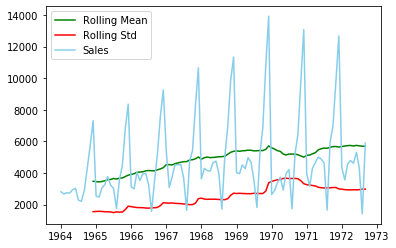

In [16]:
adfuller_test(df['Sales'])

## Differencing

In [17]:
df['Sales'].head(3)

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
Name: Sales, dtype: float64

In [18]:
df['Sales'].shift(1).head()

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
Name: Sales, dtype: float64

In [19]:
df['SeasonalShift'] = df['Sales'] - df['Sales'].shift(12)

In [20]:
df.head(14)

,Sales,SeasonalShift
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


Test Statistic:-7.626619157213163
p-value:2.060579696813685e-11
#Lags Used:0
#Observations used:92
Reject Null Hypothesis. Data is stationary


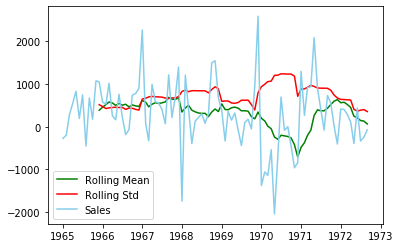

In [21]:
adfuller_test(df['SeasonalShift'].dropna())

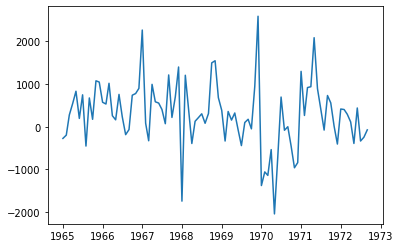

In [22]:
plt.plot(df['SeasonalShift'])

## Components of Time Series

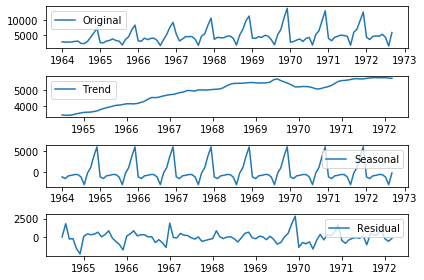

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sales'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['Sales'], label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

plt.tight_layout()

### Plotting PACF and ACF Graphs

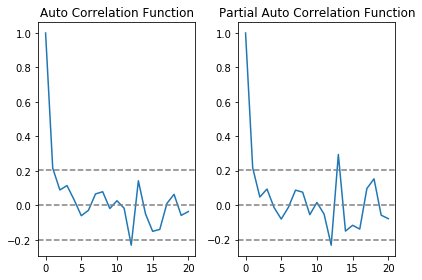

In [28]:
from statsmodels.tsa.stattools import pacf,acf
lag_acf = acf(df['SeasonalShift'].dropna(), nlags = 20)
lag_pacf = pacf(df['SeasonalShift'].dropna(), nlags = 20, method = 'ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(df['SeasonalShift'].dropna())), linestyle = '--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['SeasonalShift'].dropna())), linestyle = '--', color='gray')
plt.title('Auto Correlation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(df['SeasonalShift'].dropna())), linestyle = '--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['SeasonalShift'].dropna())), linestyle = '--', color='gray')
plt.title('Partial Auto Correlation Function')

plt.tight_layout()

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

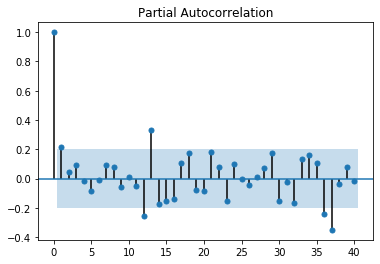

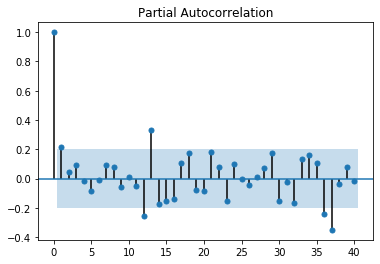

In [34]:
plot_pacf(df['SeasonalShift'].dropna(), lags = 40)

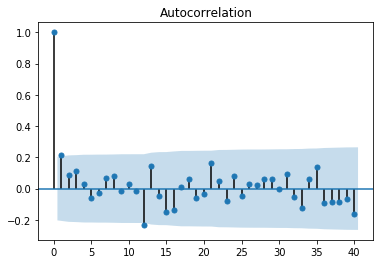

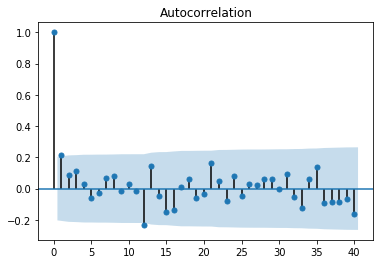

In [35]:
plot_acf(df['SeasonalShift'].dropna(), lags = 40)

it cuts the confidence level at 1. so p = 1 and q = 1.

In [36]:
#p =1 , d = 1 , q = 1
#for non seasonal data

from statsmodels.tsa.arima_model import ARIMA

In [37]:
model = ARIMA(df['Sales'], order = (1,1,1))
model_fit = model.fit()

C:\Users\kanha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kanha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 18 Jul 2020   AIC                           1910.251
Time:                        20:14:19   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7829     12.405      1.837      0.066      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

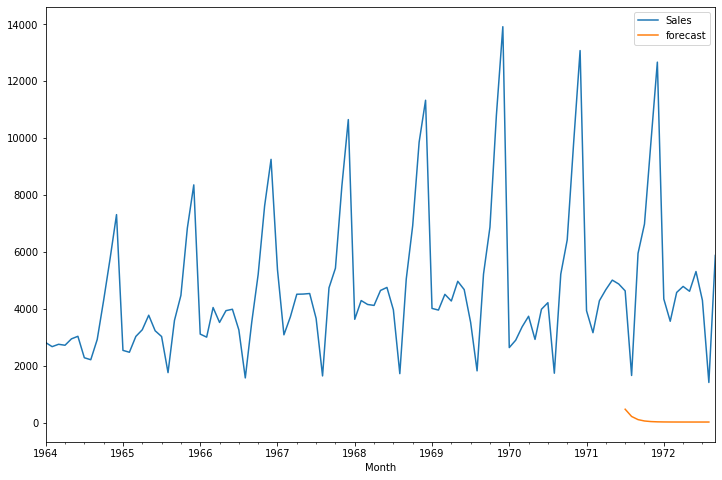

In [41]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

Since the model we used was for non seasonal data we are getting wr output.
So now lets predict values with seasonal model of ARIMA.

In [42]:
import statsmodels.api as sm

In [43]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1,1,1), seasonal_order = (1,1,1,12))
results = model.fit()

C:\Users\kanha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kanha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


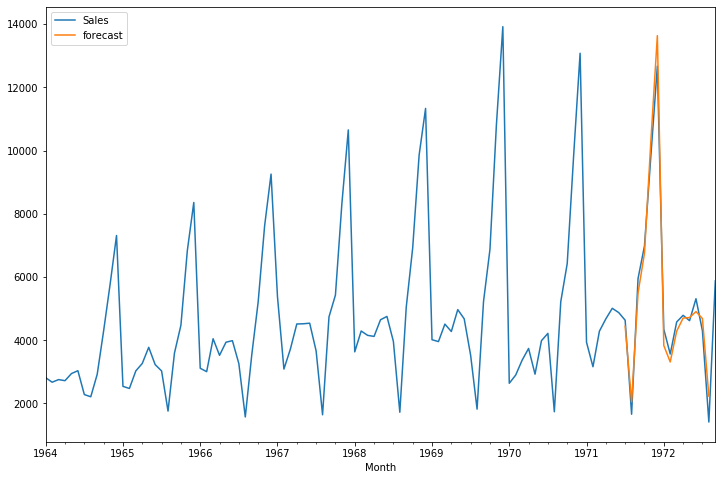

In [44]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

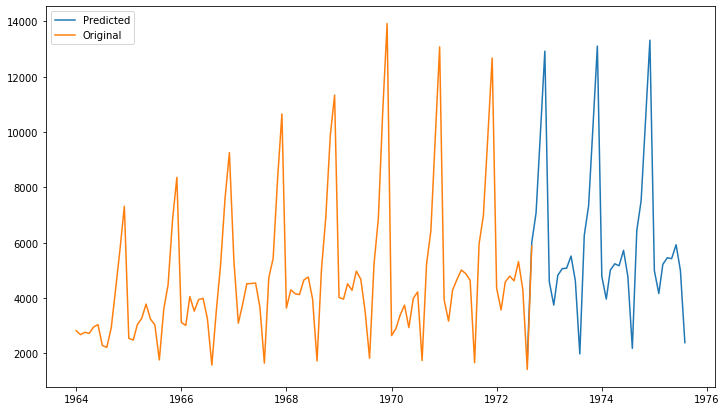

In [56]:
plt.figure(figsize = (12,7))
plt.plot(results.predict(start=103,end=139,dynamic=True),label = 'Predicted')
plt.plot(df['Sales'], label = 'Original')
plt.legend(loc = 'best')